Data Cleaning

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
tweets_df = pd.read_csv('tweets_01-08-2021.csv')

# Removing retweets
tweets_df1 = tweets_df.loc[tweets_df['isRetweet'] == "f"].copy()

# Check for any NA values in the DataFrame
na_check = tweets_df1.isna().any()
print(na_check)

id           False
text         False
isRetweet    False
isDeleted    False
device       False
favorites    False
retweets     False
date         False
isFlagged    False
dtype: bool


In [ ]:
# Convert 'date' column to datetime format
tweets_df1['date'] = pd.to_datetime(tweets_df['date'])

# Extract year from the 'date' column
tweets_df1['year'] = tweets_df1['date'].dt.year

# Calculate total tweets and 't' isFlagged tweets for each year
yearly_tweets_table = tweets_df1.groupby('year')['isFlagged'].agg(['count', lambda x: (x == 't').sum()]).reset_index()
yearly_tweets_table.columns = ['year', 'total_tweets', 'isFlagged_t_count']

# Display the resulting table
print(yearly_tweets_table)

    year  total_tweets  isFlagged_t_count
0   2009            56                  0
1   2010           142                  0
2   2011           772                  0
3   2012          3523                  0
4   2013          8128                  0
5   2014          5784                  0
6   2015          7536                  0
7   2016          4037                  0
8   2017          2292                  0
9   2018          3104                  0
10  2019          4936                  0
11  2020          6280                250
12  2021           104                  0


In [ ]:
# Convert 'date' column to datetime format
tweets_df1['date'] = pd.to_datetime(tweets_df1['date'])

# Subsetting data to only include tweets from year 2020
tweets_2020_df = tweets_df1[tweets_df1["year"] == 2020].copy()

# Create a month column
tweets_2020_df['month'] = tweets_2020_df['date'].dt.month

# Calculate total tweets and 't' isFlagged tweets for each month
monthly_tweets_table = tweets_2020_df.groupby('month')['isFlagged'].agg(['count', lambda x: (x == 't').sum()]).reset_index()
monthly_tweets_table.columns = ['month', 'total_tweets', 'isFlagged_t_count']

# Display the resulting table
print(monthly_tweets_table)


    month  total_tweets  isFlagged_t_count
0       1           397                  0
1       2           397                  0
2       3           447                  1
3       4           379                  0
4       5           568                  3
5       6           542                  3
6       7           353                  0
7       8           573                  1
8       9           724                 11
9      10           878                  4
10     11           599                170
11     12           423                 57


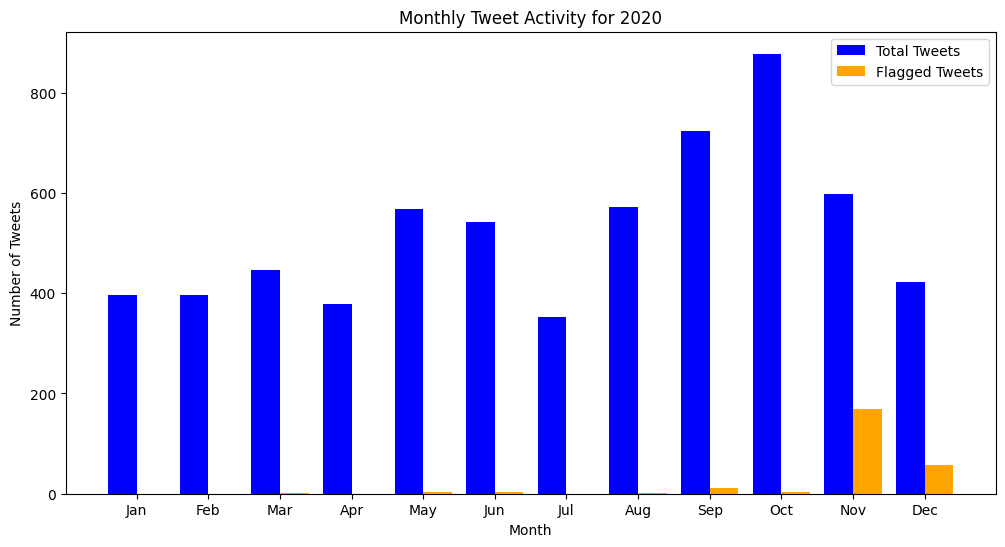

In [ ]:
# Visualization
plt.figure(figsize=(12, 6))

# Plotting total tweets for each month
plt.bar(monthly_tweets_table['month'] - 0.2, monthly_tweets_table['total_tweets'], width=0.4, label='Total Tweets', color='blue')

# Plotting 't' flagged tweets for each month
plt.bar(monthly_tweets_table['month'] + 0.2, monthly_tweets_table['isFlagged_t_count'], width=0.4, label="Flagged Tweets", color='orange')

# Adding some labels and title
plt.xlabel('Month')
plt.ylabel('Number of Tweets')
plt.title('Monthly Tweet Activity for 2020')
plt.xticks(monthly_tweets_table['month'], ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()

# Save the plot as a PNG file
plt.savefig('monthly_tweet_activity.png')

# Show the plot
plt.show()


Exploratory Analysis

In [ ]:
# Cleaned Dataset
# Trump tweets (no retweets and during the year 2020)

clean_2020_df = tweets_2020_df

print(clean_2020_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6280 entries, 1 to 56570
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         6280 non-null   int64         
 1   text       6280 non-null   object        
 2   isRetweet  6280 non-null   object        
 3   isDeleted  6280 non-null   object        
 4   device     6280 non-null   object        
 5   favorites  6280 non-null   int64         
 6   retweets   6280 non-null   int64         
 7   date       6280 non-null   datetime64[ns]
 8   isFlagged  6280 non-null   object        
 9   year       6280 non-null   int64         
 10  month      6280 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(5)
memory usage: 588.8+ KB
None


In [ ]:
flagged_tweets = clean_2020_df["isFlagged"]

# Table displaying the number and percentage of tweets which are flagged versus not flagged
frequency_table = flagged_tweets.value_counts()
percentages = (frequency_table/ len(flagged_tweets)) * 100

flagged_tweets_table = pd.DataFrame({'Frequency': frequency_table, 'Percentage': percentages})
flagged_tweets_table

,Frequency,Percentage
f,6030,96.019108
t,250,3.980892


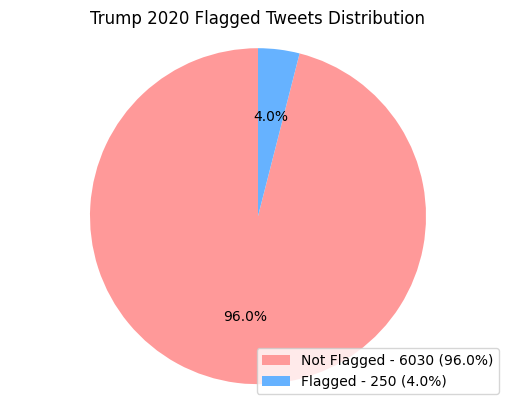

In [ ]:
import matplotlib.pyplot as plt

flag_counts = clean_2020_df['isFlagged'].value_counts()
colors = ['#FF9999', '#66B2FF']
plt.pie(flag_counts, autopct='%1.1f%%', startangle=90, colors=colors)

# Modify the legend labels to include frequency and percentage
not_flagged_label = f'Not Flagged - 6030 (96.0%)'
flagged_label = f'Flagged - 250 (4.0%)'
plt.legend([not_flagged_label, flagged_label], loc='lower right')  # Position legend at the right bottom corner

plt.axis('equal')
plt.title('Trump 2020 Flagged Tweets Distribution')

# Save the pie chart as a PNG file
plt.savefig('flagged_tweets_pie_chart_with_details_lower_right.png')

plt.show()




---



In [ ]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib import style
style.use('ggplot')
import re
import nltk
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from sklearn.ensemble import RandomForestClassifier
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from collections import Counter
!pip install imbalanced-learn
!pip install pillow==9.5
tweets_df = pd.read_csv('tweets_01-08-2021.csv')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 12.5 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


In [ ]:
# Convert 'f' and 't' to False and True
tweets_df['isRetweet'] = tweets_df['isRetweet'].replace({'f': False, 't': True})

# Convert the 'isRetweet' column to boolean type
tweets_df['isRetweet'] = tweets_df['isRetweet'].astype(bool)

# Convert 'f' and 't' to False and True
tweets_df['isDeleted'] = tweets_df['isDeleted'].replace({'f': False, 't': True})

# Convert the 'isDeleted' column to boolean type
tweets_df['isDeleted'] = tweets_df['isDeleted'].astype(bool)

# Convert 'f' and 't' to False and True
tweets_df['isFlagged'] = tweets_df['isFlagged'].replace({'f': False, 't': True})

# Convert the 'isFlagged' column to boolean type
tweets_df['isFlagged'] = tweets_df['isFlagged'].astype(bool)


tweets_df = tweets_df.loc[tweets_df['isRetweet'] == False]
tweets_df

,id,text,isRetweet,isDeleted,device,favorites,retweets,date,isFlagged
0,98454970654916608,Republicans and Democrats have both created ou...,False,False,TweetDeck,49,255,2011-08-02 18:07:48,False
1,1234653427789070336,I was thrilled to be back in the Great city of...,False,False,Twitter for iPhone,73748,17404,2020-03-03 01:34:50,False
3,1304875170860015617,The Unsolicited Mail In Ballot Scam is a major...,False,False,Twitter for iPhone,80527,23502,2020-09-12 20:10:58,False
6,1223640662689689602,Getting a little exercise this morning! https:...,False,False,Twitter for iPhone,285863,30209,2020-02-01 16:14:02,False
7,1319501865625784320,https://t.co/4qwCKQOiOw,False,False,Twitter for iPhone,130822,19127,2020-10-23 04:52:14,False
...,...,...,...,...,...,...,...,...,...
56555,1213078681750573056,"Iran never won a war, but never lost a negotia...",False,False,Twitter for iPhone,303007,57253,2020-01-03 12:44:30,False
56559,1212177432452698115,Thank you to the @dcexaminer Washington Examin...,False,False,Twitter for iPhone,35044,9213,2020-01-01 01:03:15,False
56560,1212175360093229056,One of my greatest honors was to have gotten C...,False,False,Twitter for iPhone,56731,12761,2020-01-01 00:55:01,False
56569,1319384118849949702,Just signed an order to support the workers of...,False,False,Twitter for iPhone,176289,36001,2020-10-22 21:04:21,False


In [ ]:
## Remove Stop Words and Tokenize the Tweets" ##
stop_words = set(stopwords.words('english'))
def data_processing(text):
    text= text.lower()
    text = re.sub('<br />', '', text)
    text = re.sub(r"https\S+|www\S+|http\S+", '', text, flags = re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text_tokens = word_tokenize(text)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

# clean tweets by removing stop words and unecessary text

tweets_df.text = tweets_df['text'].apply(data_processing)
tweets_df.text.head(6)

0      republicans democrats created economic problems
1    thrilled back great city charlotte north carol...
3    unsolicited mail ballot scam major threat demo...
6                      getting little exercise morning
7                                                     
8                                                     
Name: text, dtype: object

In [ ]:
## Stem the words we tokenized from the tweets ##
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data
# apply stemming to text
tweets_df.text = tweets_df['text'].apply(lambda x: stemming(x))

X = tweets_df['text']
Y = tweets_df['isFlagged']

In [ ]:
# Separate the flagged and not flagged tweets to prepare for counter
flagged_tweets =  tweets_df[tweets_df.isFlagged == True]
nonflagged_tweets = tweets_df[tweets_df.isFlagged == False]

# Seeing the most commonly used words in flagged tweets
count = Counter()
for text in flagged_tweets['text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

# seeing the most commonly used words in nonflagged tweets
for text in nonflagged_tweets['text'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('realdonaldtrump', 8405),
 ('great', 7201),
 ('trump', 5275),
 ('amp', 4930),
 ('thank', 3307),
 ('president', 3102),
 ('people', 3044),
 ('us', 2406),
 ('would', 2199),
 ('get', 2180),
 ('country', 2114),
 ('new', 2112),
 ('thanks', 2082),
 ('big', 1994),
 ('america', 1890)]

In [ ]:
# IMPORTANT FOR BALANCING
from imblearn.over_sampling import (RandomOverSampler)

vect = TfidfVectorizer()
X = vect.fit_transform(tweets_df['text'])

resamp = RandomOverSampler()
X, Y = resamp.fit_resample(X,Y)

In [ ]:
# Dimension reduction using PCA
from sklearn.decomposition import TruncatedSVD
pca = TruncatedSVD(n_components = 1000)
X_pca = pca.fit_transform(X)

In [ ]:
# split dataset into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(X_pca, Y, test_size = 0.2, random_state = 123)
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (74310, 1000)
Size of y_train:  (74310,)
Size of x_test:  (18578, 1000)
Size of y_test:  (18578,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


## naive bayes ##
x_train_nb, x_test_nb, y_train_nb, y_test_nb = train_test_split(X, Y, test_size = 0.2, random_state = 123)
print("Size of x_train_nb: ", (x_train_nb.shape))
print("Size of y_train_nb: ", (y_train_nb.shape))
print("Size of x_test_nb: ", (x_test_nb.shape))
print("Size of y_test_nb: ", (y_test_nb.shape))


mnb = MultinomialNB()
mnb.fit(x_train_nb, y_train_nb)
mnb_pred = mnb.predict(x_test_nb)
mnb_acc = accuracy_score(mnb_pred, y_test_nb)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))
print(classification_report(y_test_nb, mnb_pred))

Size of x_train_nb:  (74310, 43806)
Size of y_train_nb:  (74310,)
Size of x_test_nb:  (18578, 43806)
Size of y_test_nb:  (18578,)
Test accuracy: 97.39%
              precision    recall  f1-score   support

       False       1.00      0.95      0.97      9356
        True       0.95      1.00      0.97      9222

    accuracy                           0.97     18578
   macro avg       0.98      0.97      0.97     18578
weighted avg       0.98      0.97      0.97     18578



In [ ]:
## Logistic Regression ##
logreg = LogisticRegression(solver = "lbfgs")
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))
print(classification_report(y_test, logreg_pred))

Test accuracy: 97.32%
              precision    recall  f1-score   support

       False       1.00      0.95      0.97      9356
        True       0.95      1.00      0.97      9222

    accuracy                           0.97     18578
   macro avg       0.97      0.97      0.97     18578
weighted avg       0.97      0.97      0.97     18578



In [ ]:
## Linear SVC ##
svc = LinearSVC(C = 100, loss = 'squared_hinge')
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*10 and I 0))
print(classification_report(y_test, svc_pred))

Test accuracy: 97.86%
              precision    recall  f1-score   support

       False       1.00      0.96      0.98      9356
        True       0.96      1.00      0.98      9222

    accuracy                           0.98     18578
   macro avg       0.98      0.98      0.98     18578
weighted avg       0.98      0.98      0.98     18578



In [ ]:
## Using GridSearch to find the best hyperparameters for our SVC Model ##
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

print("best cross validation score: {:.3f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.905 total time=  11.2s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.902 total time=  11.2s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.901 total time=  16.5s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.900 total time=  15.8s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.902 total time=  14.6s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.975 total time=   3.5s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.974 total time=   3.8s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.976 total time=   4.3s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.975 total time=   3.2s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.976 total time=   3.5s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.972 total time= 1.4min
[CV 2/5] END ...................C=1, loss=hinge;,

In [ ]:
## random forest ##
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)
rf_acc = accuracy_score(rf_pred, y_test)
print("Training set score: {:.3f}".format(rf.score(x_train, y_train)))
print("Test accuracy: {:.2f}%".format(rf_acc * 100))
print(classification_report(y_test, rf_pred))

Training set score: 0.986
Test accuracy: 98.53%
              precision    recall  f1-score   support

       False       1.00      0.97      0.99      9356
        True       0.97      1.00      0.99      9222

    accuracy                           0.99     18578
   macro avg       0.99      0.99      0.99     18578
weighted avg       0.99      0.99      0.99     18578



In [ ]:
## knn ##
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred_knn)

print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred_knn))

Accuracy: 0.9849822370545807
              precision    recall  f1-score   support

       False       1.00      0.97      0.98      9356
        True       0.97      1.00      0.99      9222

    accuracy                           0.98     18578
   macro avg       0.99      0.99      0.98     18578
weighted avg       0.99      0.98      0.98     18578



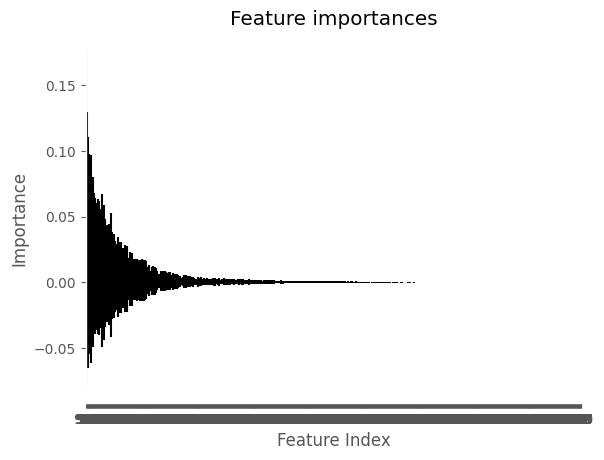

In [ ]:
#Feature index Plot

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'rf' is your trained RandomForestClassifier
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.show()



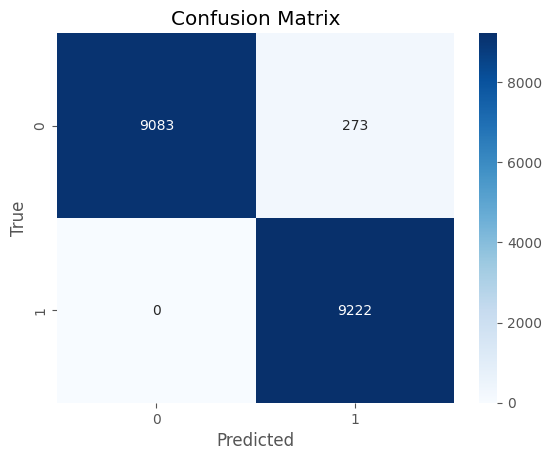

In [ ]:
# confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(y_test, rf.predict(x_test))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



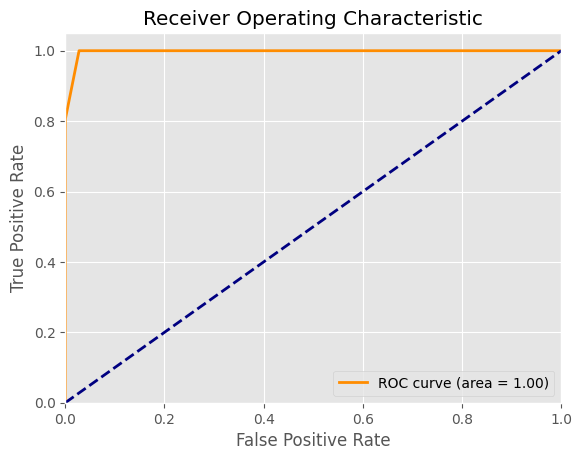

In [ ]:
#ROC and AOC

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC for a binary classification task
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


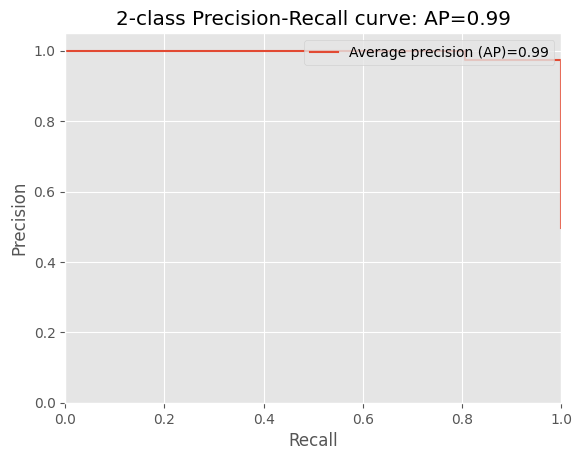

In [ ]:
#Precision recall curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

precision, recall, _ = precision_recall_curve(y_test, rf.predict_proba(x_test)[:, 1])
average_precision = average_precision_score(y_test, rf.predict_proba(x_test)[:, 1])

plt.figure()
plt.step(recall, precision, where='post', label='Average precision (AP)={0:0.2f}'.format(average_precision))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
plt.legend(loc="upper right")
plt.show()


Size of x_train_knn:  (74310, 43806)
Size of y_train_knn:  (74310,)
Size of x_test_knn:  (18578, 43806)
Size of y_test_knn:  (18578,)
Accuracy: 0.5511895790720207
              precision    recall  f1-score   support

       False       1.00      0.11      0.20      9356
        True       0.53      1.00      0.69      9222

    accuracy                           0.55     18578
   macro avg       0.76      0.55      0.44     18578
weighted avg       0.76      0.55      0.44     18578

